<a href="https://colab.research.google.com/github/Jueunkim429/Cloud-cloud/blob/main/CNN_Cloud_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install libarchive-c

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from PIL import Image
import os, glob, numpy as np
import os
from sklearn.model_selection import train_test_split
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend import set_session as K
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from keras.preprocessing.image import ImageDataGenerator
import libarchive
import pydot
import cartopy

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import tensorflow.keras
print(tensorflow.keras.__version__)

2.12.0


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Image를 학습데이터로 변환

In [10]:
img_dir =  "/content/drive/MyDrive/Colab Notebooks/clouddata/train4" #학습데이터로 변환할 데이터 위치
categories = os.listdir(img_dir)
num_classes = len(categories)

image_w = 64  #64*64*3 사이즈로 조정
image_h = 64

pixel=  image_w * image_h * 3
X=[]
y=[]

for idx, cat in enumerate(categories): # 카테고리를 enumerate를 이용하여 카테고리와 인덱스 사용
    img_dir_detail = img_dir + '/' + cat
    files = glob.glob(img_dir_detail + "/*.jpg")
    for i,f in enumerate(files):
        try:
            img = Image.open(f)
            img = img.convert('RGB')
            img = img.resize((image_w,image_h)) #이미지의 사이즈를 조정
            data = np.asarray(img)
            X.append(data)
            y.append(idx)
            if i % 300 == 0 : # 300번 마다 프린트
                print(cat, " : ", f)
        except:
            print(cat,str(i)," 번째에서 에러")

X = np.array(X)  #array로 변환
y = np.array(y)  #array로 변환

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) #train test 구분

Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/new_Ns-N163_0_181.jpg
Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/new_Ns-N168_0_4735.jpg
Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/new_Ns-N209_0_5639.jpg
Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/new_Ns-N253_0_7349.jpg
Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/new_Ns-N059_0_6502.jpg
Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/new_Ns-N111_0_8293.jpg
Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/new_Ns-N145_0_4242.jpg
Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/Ns-N091.jpg
Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/new_Ns-N026_0_7109.jpg
St  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/St/new_St-N103_0_5491.jpg
St  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/St/new_St-N105_0_6055.jpg
St  :  /content/drive/MyDrive/Col

## 학습데이터 가공

In [17]:
print(X_train.shape) # 데이터 크기 확인
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# img를 array로 변환시 0~255의 값을 가지는데 이것을 0~1로 변환
X_train = X_train.astype(float) / 255.0
X_test = X_test.astype(float) / 255.0

from keras.utils import to_categorical
# 기존의 1의 값을가지는 y값을 [0,1,0,0,---]와 같이 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(8579, 64, 64, 3)
(8579,)
(3678, 64, 64, 3)
(3678,)


## 모델 구축

### model 1

In [18]:
image_w = 64
image_h = 64

with tf.device('/device:GPU:0'):
    model = Sequential()

    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax')) # 출력 레이어 수정

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_dir = './model'
    model_path = model_dir + "/cloud_classify.model"

    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [20]:
X_train.shape
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
242/242 [==============================] - 13s 11ms/step - loss: 1.3715 - accuracy: 0.4306 - val_loss: 1.2233 - val_accuracy: 0.5070
Epoch 2/100
242/242 [==============================] - 2s 9ms/step - loss: 1.1671 - accuracy: 0.5283 - val_loss: 1.0850 - val_accuracy: 0.5513
Epoch 3/100
242/242 [==============================] - 2s 9ms/step - loss: 1.0524 - accuracy: 0.5697 - val_loss: 1.0042 - val_accuracy: 0.6084
Epoch 4/100
242/242 [==============================] - 2s 7ms/step - loss: 0.9647 - accuracy: 0.6182 - val_loss: 0.9032 - val_accuracy: 0.6457
Epoch 5/100
242/242 [==============================] - 2s 8ms/step - loss: 0.8389 - accuracy: 0.6665 - val_loss: 0.8168 - val_accuracy: 0.6760
Epoch 6/100
242/242 [==============================] - 2s 7ms/step - loss: 0.7538 - accuracy: 0.7019 - val_loss: 0.7386 - val_accuracy: 0.7075
Epoch 7/100
242/242 [==============================] - 2s 7ms/step - loss: 0.6788 - accuracy: 0.7315 - val_loss: 0.6569 - val_accuracy: 0.74

In [21]:
print("정확도 : %.2f" %(model.evaluate(X_test, y_test)[1]))

115/115 [==============================] - 1s 4ms/step - loss: 0.3675 - accuracy: 0.9241
정확도 : 0.92


In [22]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9253
평균 손실: 0.1941
평균 검증 정확도: 0.8877
평균 검증 손실: 0.3605


### model 2

In [23]:
with tf.device('/device:GPU:0'):
    model2 = Sequential()

    model2.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model2.add(MaxPooling2D(pool_size=(2,2)))
    model2.add(Dropout(0.25))

    model2.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model2.add(MaxPooling2D(pool_size=(2,2)))
    model2.add(Dropout(0.25))

    model2.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model2.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model2.add(MaxPooling2D(pool_size=(2,2)))
    model2.add(Dropout(0.25))

    model2.add(Flatten())
    model2.add(Dense(256, activation = 'relu'))
    model2.add(Dropout(0.5))
    model2.add(Dense(num_classes, activation = 'softmax'))

    model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])

    model_dir = './model2'
    model_path = model_dir + "/cloud_classify.model2"

    checkpoint = ModelCheckpoint(filepath = model_path, monitor='val_loss', verbose = 1, save_best_only = True)
    early_stopping = EarlyStopping(monitor = 'val_loss', patience = 6)


In [24]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)       

In [25]:
history = model2.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)
#callbacks=[checkpoint, early_stopping]

Epoch 1/100
242/242 [==============================] - 5s 11ms/step - loss: 1.3710 - accuracy: 0.4246 - val_loss: 1.3017 - val_accuracy: 0.4499
Epoch 2/100
242/242 [==============================] - 2s 9ms/step - loss: 1.1594 - accuracy: 0.5365 - val_loss: 1.0758 - val_accuracy: 0.5618
Epoch 3/100
242/242 [==============================] - 2s 9ms/step - loss: 1.0545 - accuracy: 0.5736 - val_loss: 1.1198 - val_accuracy: 0.5431
Epoch 4/100
242/242 [==============================] - 2s 9ms/step - loss: 0.9304 - accuracy: 0.6270 - val_loss: 0.8850 - val_accuracy: 0.6667
Epoch 5/100
242/242 [==============================] - 2s 9ms/step - loss: 0.8174 - accuracy: 0.6735 - val_loss: 0.7437 - val_accuracy: 0.7075
Epoch 6/100
242/242 [==============================] - 2s 9ms/step - loss: 0.7067 - accuracy: 0.7189 - val_loss: 0.6940 - val_accuracy: 0.7214
Epoch 7/100
242/242 [==============================] - 2s 9ms/step - loss: 0.5885 - accuracy: 0.7684 - val_loss: 0.5222 - val_accuracy: 0.786

In [26]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9275
평균 손실: 0.1907
평균 검증 정확도: 0.9033
평균 검증 손실: 0.2898


### model2 + normalization

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

with tf.device('/device:GPU:0'):
    model3 = Sequential()

    model3.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:]))
    model3.add(BatchNormalization())
    model3.add(Activation("relu"))
    model3.add(MaxPooling2D(pool_size=(2,2)))
    model3.add(Dropout(0.25))

    model3.add(Conv2D(64, (3,3), padding="same"))
    model3.add(BatchNormalization())
    model3.add(Activation("relu"))
    model3.add(MaxPooling2D(pool_size=(2,2)))
    model3.add(Dropout(0.25))

    model3.add(Conv2D(128, (3,3), padding="same"))
    model3.add(BatchNormalization())
    model3.add(Activation("relu"))
    model3.add(Conv2D(128, (3,3), padding="same"))
    model3.add(BatchNormalization())
    model3.add(Activation("relu"))
    model3.add(MaxPooling2D(pool_size=(2,2)))
    model3.add(Dropout(0.25))

    model3.add(Flatten())
    model3.add(Dense(256, activation='relu'))
    model3.add(Dropout(0.5))
    model3.add(Dense(num_classes, activation='softmax'))

    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_dir = './model3'
    model_path = model_dir + "/cloud_classify.model3"

    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)


In [28]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)       

In [63]:
history = model3.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)
#callbacks=[checkpoint, early_stopping]

Epoch 1/100
242/242 [==============================] - 3s 13ms/step - loss: 0.1130 - accuracy: 0.9540 - val_loss: 0.2132 - val_accuracy: 0.9277
Epoch 2/100
242/242 [==============================] - 3s 13ms/step - loss: 0.1336 - accuracy: 0.9485 - val_loss: 0.3509 - val_accuracy: 0.8974
Epoch 3/100
242/242 [==============================] - 3s 13ms/step - loss: 0.1105 - accuracy: 0.9542 - val_loss: 2.2269 - val_accuracy: 0.7098
Epoch 4/100
242/242 [==============================] - 3s 13ms/step - loss: 0.1298 - accuracy: 0.9470 - val_loss: 0.1841 - val_accuracy: 0.9347
Epoch 5/100
242/242 [==============================] - 3s 13ms/step - loss: 0.1335 - accuracy: 0.9482 - val_loss: 0.1660 - val_accuracy: 0.9441
Epoch 6/100
242/242 [==============================] - 3s 13ms/step - loss: 0.1104 - accuracy: 0.9558 - val_loss: 0.1509 - val_accuracy: 0.9417
Epoch 7/100
242/242 [==============================] - 3s 13ms/step - loss: 0.1113 - accuracy: 0.9532 - val_loss: 0.4341 - val_accuracy:

In [64]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9689
평균 손실: 0.0771
평균 검증 정확도: 0.8802
평균 검증 손실: 1.2463


### model1 + **normalization**

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 모델 구성
model4 = Sequential()

model4.add(Conv2D(32, (3,3), padding="same", input_shape=(image_w, image_h, 3), activation="relu"))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_dir = './model4'
model_path = model_dir + "/cloud_classify.model4"

checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)


In [32]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 64)      

In [33]:
X_train.shape
history = model4.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
242/242 [==============================] - 5s 11ms/step - loss: 1.9721 - accuracy: 0.3830 - val_loss: 9.6367 - val_accuracy: 0.3042
Epoch 2/100
242/242 [==============================] - 2s 10ms/step - loss: 1.3328 - accuracy: 0.4278 - val_loss: 1.8203 - val_accuracy: 0.4872
Epoch 3/100
242/242 [==============================] - 2s 9ms/step - loss: 1.2706 - accuracy: 0.4489 - val_loss: 1.2126 - val_accuracy: 0.4918
Epoch 4/100
242/242 [==============================] - 2s 9ms/step - loss: 1.2334 - accuracy: 0.4747 - val_loss: 1.2606 - val_accuracy: 0.4720
Epoch 5/100
242/242 [==============================] - 2s 9ms/step - loss: 1.2167 - accuracy: 0.4769 - val_loss: 1.1019 - val_accuracy: 0.5256
Epoch 6/100
242/242 [==============================] - 2s 9ms/step - loss: 1.1723 - accuracy: 0.5128 - val_loss: 1.1512 - val_accuracy: 0.5210
Epoch 7/100
242/242 [==============================] - 2s 10ms/step - loss: 1.1384 - accuracy: 0.5217 - val_loss: 1.0533 - val_accuracy: 0.5

In [34]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.7754
평균 손실: 0.5500
평균 검증 정확도: 0.7621
평균 검증 손실: 0.8203


### model1+RMSprop

In [35]:
from tensorflow.keras.optimizers import RMSprop
image_w = 64
image_h = 64

with tf.device('/device:GPU:0'):
    model5 = Sequential()

    model5.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model5.add(MaxPooling2D(pool_size=(2,2)))
    model5.add(Dropout(0.25))

    model5.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model5.add(MaxPooling2D(pool_size=(2,2)))
    model5.add(Dropout(0.25))

    model5.add(Flatten())
    model5.add(Dense(256, activation='relu'))
    model5.add(Dropout(0.5))
    model5.add(Dense(num_classes, activation='softmax')) # 출력 레이어 수정

    model5.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

    model_dir = './model5'
    model_path = model_dir + "/cloud_classify.model5"

    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [36]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 16, 16, 64)       

In [37]:
X_train.shape
history = model5.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
242/242 [==============================] - 4s 8ms/step - loss: 1.3954 - accuracy: 0.4378 - val_loss: 1.2579 - val_accuracy: 0.5163
Epoch 2/100
242/242 [==============================] - 2s 7ms/step - loss: 1.1742 - accuracy: 0.5293 - val_loss: 1.1433 - val_accuracy: 0.5198
Epoch 3/100
242/242 [==============================] - 2s 7ms/step - loss: 1.0750 - accuracy: 0.5754 - val_loss: 1.1352 - val_accuracy: 0.5186
Epoch 4/100
242/242 [==============================] - 2s 7ms/step - loss: 0.9779 - accuracy: 0.6122 - val_loss: 1.1695 - val_accuracy: 0.4779
Epoch 5/100
242/242 [==============================] - 2s 7ms/step - loss: 0.8771 - accuracy: 0.6481 - val_loss: 0.8492 - val_accuracy: 0.6562
Epoch 6/100
242/242 [==============================] - 2s 7ms/step - loss: 0.7830 - accuracy: 0.6969 - val_loss: 0.7898 - val_accuracy: 0.6841
Epoch 7/100
242/242 [==============================] - 2s 7ms/step - loss: 0.6801 - accuracy: 0.7389 - val_loss: 0.8087 - val_accuracy: 0.6807

In [38]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9240
평균 손실: 0.2194
평균 검증 정확도: 0.8721
평균 검증 손실: 0.4758


### model2+RMSprop

In [39]:
with tf.device('/device:GPU:0'):
    model6 = Sequential()

    model6.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model6.add(MaxPooling2D(pool_size=(2,2)))
    model6.add(Dropout(0.25))

    model6.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model6.add(MaxPooling2D(pool_size=(2,2)))
    model6.add(Dropout(0.25))

    model6.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model6.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model6.add(MaxPooling2D(pool_size=(2,2)))
    model6.add(Dropout(0.25))

    model6.add(Flatten())
    model6.add(Dense(256, activation = 'relu'))
    model6.add(Dropout(0.5))
    model6.add(Dense(num_classes, activation = 'softmax'))

    model6.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop',metrics=['accuracy'])

    model_dir = './model6'
    model_path = model_dir + "/cloud_classify.model6"

    checkpoint = ModelCheckpoint(filepath = model_path, monitor='val_loss', verbose = 1, save_best_only = True)
    early_stopping = EarlyStopping(monitor = 'val_loss', patience = 6)

In [40]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 16, 16, 64)       

In [41]:
history = model6.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)
#callbacks=[checkpoint, early_stopping]

Epoch 1/100
242/242 [==============================] - 5s 11ms/step - loss: 1.4192 - accuracy: 0.4160 - val_loss: 1.2512 - val_accuracy: 0.4837
Epoch 2/100
242/242 [==============================] - 2s 9ms/step - loss: 1.1835 - accuracy: 0.5255 - val_loss: 1.2166 - val_accuracy: 0.4918
Epoch 3/100
242/242 [==============================] - 2s 9ms/step - loss: 1.0633 - accuracy: 0.5836 - val_loss: 2.0094 - val_accuracy: 0.2972
Epoch 4/100
242/242 [==============================] - 2s 9ms/step - loss: 0.9575 - accuracy: 0.6267 - val_loss: 0.8657 - val_accuracy: 0.6364
Epoch 5/100
242/242 [==============================] - 2s 10ms/step - loss: 0.8352 - accuracy: 0.6731 - val_loss: 0.8938 - val_accuracy: 0.6492
Epoch 6/100
242/242 [==============================] - 2s 9ms/step - loss: 0.7173 - accuracy: 0.7283 - val_loss: 0.8021 - val_accuracy: 0.6760
Epoch 7/100
242/242 [==============================] - 2s 9ms/step - loss: 0.6227 - accuracy: 0.7651 - val_loss: 0.7628 - val_accuracy: 0.71

In [42]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.8674
평균 손실: 0.4890
평균 검증 정확도: 0.8558
평균 검증 손실: 0.5575


### model1+Adamax

In [43]:
from tensorflow.keras.optimizers import Adamax
image_w = 64
image_h = 64

with tf.device('/device:GPU:0'):
    model7 = Sequential()

    model7.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model7.add(MaxPooling2D(pool_size=(2,2)))
    model7.add(Dropout(0.25))

    model7.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model7.add(MaxPooling2D(pool_size=(2,2)))
    model7.add(Dropout(0.25))

    model7.add(Flatten())
    model7.add(Dense(256, activation='relu'))
    model7.add(Dropout(0.5))
    model7.add(Dense(num_classes, activation='softmax')) # 출력 레이어 수정

    model7.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

    model_dir = './model7'
    model_path = model_dir + "/cloud_classify.model7"

    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [44]:
model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 16, 16, 64)       

In [45]:
X_train.shape
history = model7.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
242/242 [==============================] - 4s 8ms/step - loss: 1.3960 - accuracy: 0.4192 - val_loss: 1.3457 - val_accuracy: 0.4371
Epoch 2/100
242/242 [==============================] - 2s 7ms/step - loss: 1.2454 - accuracy: 0.4932 - val_loss: 1.2259 - val_accuracy: 0.4977
Epoch 3/100
242/242 [==============================] - 2s 7ms/step - loss: 1.1715 - accuracy: 0.5238 - val_loss: 1.1486 - val_accuracy: 0.5396
Epoch 4/100
242/242 [==============================] - 2s 7ms/step - loss: 1.1044 - accuracy: 0.5516 - val_loss: 1.1054 - val_accuracy: 0.5501
Epoch 5/100
242/242 [==============================] - 2s 7ms/step - loss: 1.0512 - accuracy: 0.5764 - val_loss: 1.0531 - val_accuracy: 0.5758
Epoch 6/100
242/242 [==============================] - 2s 7ms/step - loss: 0.9888 - accuracy: 0.6054 - val_loss: 0.9912 - val_accuracy: 0.5967
Epoch 7/100
242/242 [==============================] - 2s 7ms/step - loss: 0.9388 - accuracy: 0.6287 - val_loss: 0.9452 - val_accuracy: 0.6049

In [46]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.8856
평균 손실: 0.2943
평균 검증 정확도: 0.8644
평균 검증 손실: 0.3602


### model2+Adamax

In [82]:
from tensorflow.keras.optimizers import Adamax

with tf.device('/device:GPU:0'):
    model8 = Sequential()

    model8.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model8.add(MaxPooling2D(pool_size=(2,2)))
    model8.add(Dropout(0.25))

    model8.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model8.add(MaxPooling2D(pool_size=(2,2)))
    model8.add(Dropout(0.25))

    model8.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model8.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model8.add(MaxPooling2D(pool_size=(2,2)))
    model8.add(Dropout(0.25))

    model8.add(Flatten())
    model8.add(Dense(256, activation = 'relu'))
    model8.add(Dropout(0.5))
    model8.add(Dense(num_classes, activation = 'softmax'))

    model8.compile(loss = 'categorical_crossentropy', optimizer = 'Adamax',metrics=['accuracy'])

    model_dir = './model8'
    model_path = model_dir + "/cloud_classify.model8"

    checkpoint = ModelCheckpoint(filepath = model_path, monitor='val_loss', verbose = 1, save_best_only = True)
    early_stopping = EarlyStopping(monitor = 'val_loss', patience = 6)

In [48]:
model8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 16, 16, 64)       

In [83]:
history = model8.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)
#callbacks=[checkpoint, early_stopping]

Epoch 1/100
242/242 [==============================] - 4s 10ms/step - loss: 1.3734 - accuracy: 0.4194 - val_loss: 1.2918 - val_accuracy: 0.4779
Epoch 2/100
242/242 [==============================] - 2s 9ms/step - loss: 1.2093 - accuracy: 0.5108 - val_loss: 1.1437 - val_accuracy: 0.5396
Epoch 3/100
242/242 [==============================] - 2s 9ms/step - loss: 1.1049 - accuracy: 0.5580 - val_loss: 1.1995 - val_accuracy: 0.4930
Epoch 4/100
242/242 [==============================] - 2s 9ms/step - loss: 1.0172 - accuracy: 0.6025 - val_loss: 1.0087 - val_accuracy: 0.5851
Epoch 5/100
242/242 [==============================] - 2s 9ms/step - loss: 0.9312 - accuracy: 0.6311 - val_loss: 0.9800 - val_accuracy: 0.6014
Epoch 6/100
242/242 [==============================] - 2s 9ms/step - loss: 0.8489 - accuracy: 0.6644 - val_loss: 0.9083 - val_accuracy: 0.6270
Epoch 7/100
242/242 [==============================] - 2s 9ms/step - loss: 0.7767 - accuracy: 0.6974 - val_loss: 0.8500 - val_accuracy: 0.659

In [84]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9259
평균 손실: 0.1874
평균 검증 정확도: 0.9043
평균 검증 손실: 0.2653


### model1+Adamax+normalization

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adamax

# 모델 구성
model9 = Sequential()

model9.add(Conv2D(32, (3,3), padding="same", input_shape=(image_w, image_h, 3), activation="relu"))
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2,2)))
model9.add(Dropout(0.25))

model9.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2,2)))
model9.add(Dropout(0.25))

model9.add(Flatten())
model9.add(Dense(256, activation='relu'))
model9.add(Dropout(0.5))
model9.add(Dense(num_classes, activation='softmax'))

model9.compile(loss = 'categorical_crossentropy', optimizer = 'Adamax',metrics=['accuracy'])

model_dir = './model9'
model_path = model_dir + "/cloud_classify.model9"

checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [52]:
model9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 64)      

In [53]:
X_train.shape
history = model9.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
242/242 [==============================] - 5s 12ms/step - loss: 1.8242 - accuracy: 0.4417 - val_loss: 11.3449 - val_accuracy: 0.2657
Epoch 2/100
242/242 [==============================] - 2s 10ms/step - loss: 1.1683 - accuracy: 0.5235 - val_loss: 3.0268 - val_accuracy: 0.4499
Epoch 3/100
242/242 [==============================] - 2s 9ms/step - loss: 1.0778 - accuracy: 0.5602 - val_loss: 1.2311 - val_accuracy: 0.5688
Epoch 4/100
242/242 [==============================] - 2s 9ms/step - loss: 0.9913 - accuracy: 0.5964 - val_loss: 0.9316 - val_accuracy: 0.6434
Epoch 5/100
242/242 [==============================] - 2s 10ms/step - loss: 0.9123 - accuracy: 0.6284 - val_loss: 1.1152 - val_accuracy: 0.5991
Epoch 6/100
242/242 [==============================] - 2s 10ms/step - loss: 0.8497 - accuracy: 0.6576 - val_loss: 0.9423 - val_accuracy: 0.6387
Epoch 7/100
242/242 [==============================] - 2s 10ms/step - loss: 0.7864 - accuracy: 0.6752 - val_loss: 0.8737 - val_accuracy: 

In [54]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9107
평균 손실: 0.2293
평균 검증 정확도: 0.8545
평균 검증 손실: 0.5607


### model2+Adamax+normalization

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

with tf.device('/device:GPU:0'):
    model10 = Sequential()

    model10.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:]))
    model10.add(BatchNormalization())
    model10.add(Activation("relu"))
    model10.add(MaxPooling2D(pool_size=(2,2)))
    model10.add(Dropout(0.25))

    model10.add(Conv2D(64, (3,3), padding="same"))
    model10.add(BatchNormalization())
    model10.add(Activation("relu"))
    model10.add(MaxPooling2D(pool_size=(2,2)))
    model10.add(Dropout(0.25))

    model10.add(Conv2D(128, (3,3), padding="same"))
    model10.add(BatchNormalization())
    model10.add(Activation("relu"))
    model10.add(Conv2D(128, (3,3), padding="same"))
    model10.add(BatchNormalization())
    model10.add(Activation("relu"))
    model10.add(MaxPooling2D(pool_size=(2,2)))
    model10.add(Dropout(0.25))

    model10.add(Flatten())
    model10.add(Dense(256, activation='relu'))
    model10.add(Dropout(0.5))
    model10.add(Dense(num_classes, activation='softmax'))

    model10.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

    model_dir = './model10'
    model_path = model_dir + "/cloud_classify.model10"

    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)


In [56]:
model10.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 64)       

In [57]:
history = model10.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)
#callbacks=[checkpoint, early_stopping]

Epoch 1/100
242/242 [==============================] - 6s 14ms/step - loss: 1.8828 - accuracy: 0.3887 - val_loss: 1.5647 - val_accuracy: 0.2413
Epoch 2/100
242/242 [==============================] - 3s 13ms/step - loss: 1.3342 - accuracy: 0.4362 - val_loss: 1.4119 - val_accuracy: 0.4079
Epoch 3/100
242/242 [==============================] - 3s 13ms/step - loss: 1.2808 - accuracy: 0.4656 - val_loss: 1.2232 - val_accuracy: 0.4988
Epoch 4/100
242/242 [==============================] - 3s 13ms/step - loss: 1.2446 - accuracy: 0.4904 - val_loss: 1.2138 - val_accuracy: 0.4942
Epoch 5/100
242/242 [==============================] - 3s 13ms/step - loss: 1.2042 - accuracy: 0.5003 - val_loss: 1.1749 - val_accuracy: 0.5058
Epoch 6/100
242/242 [==============================] - 3s 13ms/step - loss: 1.1540 - accuracy: 0.5267 - val_loss: 1.0991 - val_accuracy: 0.5350
Epoch 7/100
242/242 [==============================] - 3s 13ms/step - loss: 1.1210 - accuracy: 0.5477 - val_loss: 1.0557 - val_accuracy:

In [58]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.8410
평균 손실: 0.3924
평균 검증 정확도: 0.8227
평균 검증 손실: 0.4535


## test

### test data로 비교

In [74]:
from keras.models import load_model

path = "/content/drive/MyDrive/Colab Notebooks/clouddata/test/"
category = os.listdir("/content/drive/MyDrive/Colab Notebooks/clouddata/train4") #train위치

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(path+"/*.*")
for f in files:
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
prediction_test = model3.predict(X)

file_index = 0
for i in prediction_test:
    label = i.argmax() # [0.000, 0.000, 0.000, ..., 0.000, 1.000, 0.000] 중 최대값 추출 즉,1값의 인덱스
    print("////////////////////")
    print( filenames[file_index].split('/')[-1] + "의 예측되는 구름종류 : " + category[label])
    file_index  = file_index+1

7/7 [==============================] - 0s 3ms/step
////////////////////
1.jpg의 예측되는 구름종류 : Cc
////////////////////
100.jpg의 예측되는 구름종류 : Cc
////////////////////
101.jpg의 예측되는 구름종류 : Cc
////////////////////
104.jpg의 예측되는 구름종류 : Ns
////////////////////
10.jpg의 예측되는 구름종류 : Cc
////////////////////
102.jpg의 예측되는 구름종류 : Cc
////////////////////
106.jpg의 예측되는 구름종류 : Cc
////////////////////
108.jpg의 예측되는 구름종류 : Cc
////////////////////
107.jpg의 예측되는 구름종류 : Cc
////////////////////
103.jpg의 예측되는 구름종류 : Cc
////////////////////
105.jpg의 예측되는 구름종류 : Sc
////////////////////
12.jpg의 예측되는 구름종류 : Cc
////////////////////
130.jpg의 예측되는 구름종류 : Cc
////////////////////
131.jpg의 예측되는 구름종류 : Cc
////////////////////
137.jpg의 예측되는 구름종류 : Ns
////////////////////
122.jpg의 예측되는 구름종류 : Cc
////////////////////
119.jpg의 예측되는 구름종류 : Sc
////////////////////
117.jpg의 예측되는 구름종류 : Cc
////////////////////
118.jpg의 예측되는 구름종류 : Ns
////////////////////
127.jpg의 예측되는 구름종류 : Sc
////////////////////
123.jpg의 예측되는 구름종류 : Cc
////////

In [ ]:
from keras.models import load_model

path = "/content/drive/MyDrive/Colab Notebooks/clouddata/test/"
category = os.listdir("/content/drive/MyDrive/Colab Notebooks/clouddata/train4") #train위치

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(path+"/*.*")
for f in files:
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
prediction_test = model8.predict(X)

file_index = 0
for i in prediction_test:
    label = i.argmax() # [0.000, 0.000, 0.000, ..., 0.000, 1.000, 0.000] 중 최대값 추출 즉,1값의 인덱스
    print("////////////////////")
    print( filenames[file_index].split('/')[-1] + "의 예측되는 구름종류 : " + category[label])
    file_index  = file_index+1

### 직접 찍은 data로 비교

In [65]:
def weather (label) :
  if label == "Cc" :
    print("눈꺼풀 구름입니다.")
    print("단일한 선 모양입니다.")
    print("날씨에 큰 영향을 미치지 않는 구름입니다.")
  elif label == "Cb" :
    print("눈구름입니다.")
    print("세포 형태의 구름입니다.")
    print("번개, 천둥, 강한 바람과 폭우가 내릴 수 있습니다. 외출을 자제해주세요!")
  elif label == "Ns" :
    print("적란운입니다.")
    print("수직 형태의 구름입니다.")
    print("비, 이슬비가 내릴 수 있습니다. 우산을 챙겨 외출해주세요!")
  elif label == "Sc" :
    print("층운입니다.")
    print("둥글고 조각난 모양의 구름입니다.")
    print("안정된 날씨에 발생하는 구름입니다. 마음놓고 외출하셔도 좋습니다!")
  elif label == "St" :
    print("적운입니다.")
    print("평평하고 수평으로 퍼진 모양의 구름입니다.")
    print("약한 강수나 가벼운 이슬비가 내릴 수 있습니다. 흐림과 안개를 동반합니다. 우산을 챙겨 외출해주세요! 좋습니다!")

1/1 [==============================] - 0s 19ms/step
////////////////////


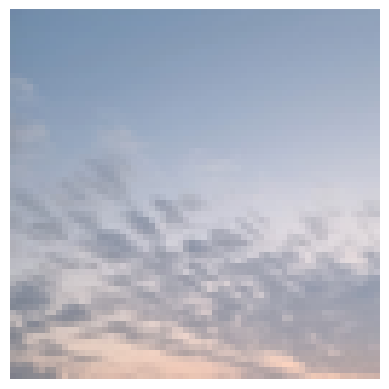

층운입니다.
둥글고 조각난 모양의 구름입니다.
안정된 날씨에 발생하는 구름입니다. 마음놓고 외출하셔도 좋습니다!
cloud1.jpg의 예측되는 구름종류 : Sc
////////////////////


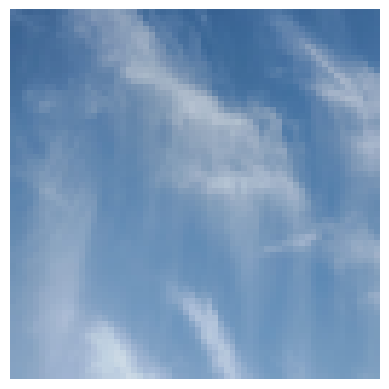

눈꺼풀 구름입니다.
단일한 선 모양입니다.
날씨에 큰 영향을 미치지 않는 구름입니다.
cloud2.jpg의 예측되는 구름종류 : Cc
////////////////////


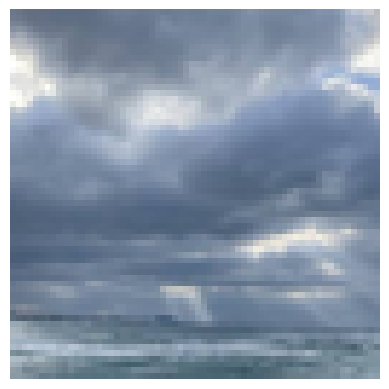

눈꺼풀 구름입니다.
단일한 선 모양입니다.
날씨에 큰 영향을 미치지 않는 구름입니다.
cloud11.jpg의 예측되는 구름종류 : Cc
////////////////////


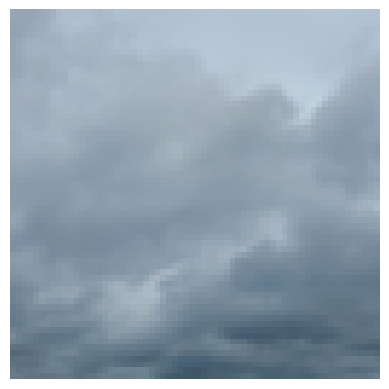

눈꺼풀 구름입니다.
단일한 선 모양입니다.
날씨에 큰 영향을 미치지 않는 구름입니다.
cloud.jpg의 예측되는 구름종류 : Cc


In [85]:
from keras.models import load_model

path2 = "/content/drive/MyDrive/Colab Notebooks/myclouddata/"
category = os.listdir("/content/drive/MyDrive/Colab Notebooks/clouddata/train4")

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(path2+"/*.*")

for f in files:
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
prediction_test = model3.predict(X)

file_index = 0
k=0
for i in prediction_test:
    label = i.argmax() # [0.000, 0.000, 0.000, ..., 0.000, 1.000, 0.000] 중 최대값 추출 즉,1값의 인덱스
    print("////////////////////")
    #사진 나타내기
    plt.imshow(X[k])
    plt.axis('off')
    plt.show()
    # 날씨 예측
    weather(category[label])
    print( filenames[file_index].split('/')[-1] + "의 예측되는 구름종류 : " + category[label])
    file_index  = file_index+1
    k=k+1


1/1 [==============================] - 0s 18ms/step
////////////////////


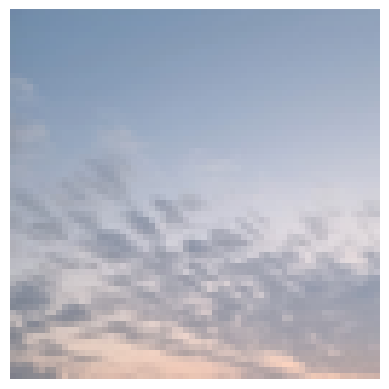

눈꺼풀 구름입니다.
단일한 선 모양입니다.
날씨에 큰 영향을 미치지 않는 구름입니다.
cloud1.jpg의 예측되는 구름종류 : Cc
////////////////////


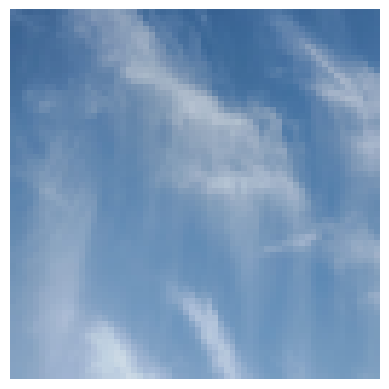

눈꺼풀 구름입니다.
단일한 선 모양입니다.
날씨에 큰 영향을 미치지 않는 구름입니다.
cloud2.jpg의 예측되는 구름종류 : Cc
////////////////////


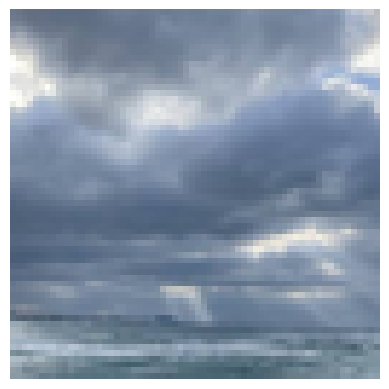

눈꺼풀 구름입니다.
단일한 선 모양입니다.
날씨에 큰 영향을 미치지 않는 구름입니다.
cloud11.jpg의 예측되는 구름종류 : Cc
////////////////////


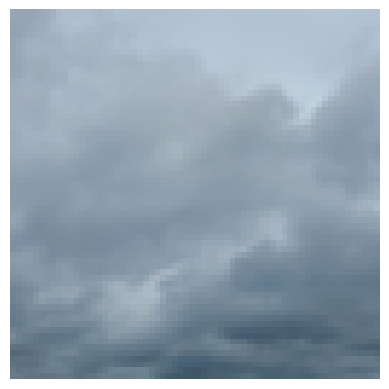

눈꺼풀 구름입니다.
단일한 선 모양입니다.
날씨에 큰 영향을 미치지 않는 구름입니다.
cloud.jpg의 예측되는 구름종류 : Cc


In [81]:
from keras.models import load_model

path2 = "/content/drive/MyDrive/Colab Notebooks/myclouddata/"
category = os.listdir("/content/drive/MyDrive/Colab Notebooks/clouddata/train4")

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(path2+"/*.*")
for f in files:
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
prediction_test = model8.predict(X)

file_index = 0
k=0
for i in prediction_test:
    label = i.argmax() # [0.000, 0.000, 0.000, ..., 0.000, 1.000, 0.000] 중 최대값 추출 즉,1값의 인덱스
    print("////////////////////")
    #사진 나타내기
    plt.imshow(X[k])
    plt.axis('off')
    plt.show()
    # 날씨 예측
    weather(category[label])
    print( filenames[file_index].split('/')[-1] + "의 예측되는 구름종류 : " + category[label])
    file_index  = file_index+1
    k=k+1